In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
import numpy as np
import random

import mlflow
import mlflow.sklearn


In [ ]:
df = pd.read_csv("./recife_occurrences.csv")
df.head()

,id,documentNumber,address,state,region,city,neighborhood,subNeighborhood,locality,latitude,longitude,date,policeAction,agentPresence,relatedRecord,contextInfo,transports,victims,animalVictims
0,f7932b42-6f5e-43f7-aadf-5b53fa44701c,12622,"Av. Jardim Muribeca - Muribeca, Jaboatão dos G...","{'id': '813ca36b-91e3-4a18-b408-60b27a1942ef',...","{'id': '758e86d0-b5e0-410d-b8d8-b7061299be1a',...","{'id': '5bd3bfe5-4989-4bc3-a646-fe77a876fce0',...","{'id': '60d7c5c7-1f97-4e04-9afd-11f4241c29d9',...",NaN,NaN,-8.157637,-34.969637,2018-04-01T00:00:00.000Z,False,False,NaN,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,[],[{'id': '05958a3c-aa0a-4971-8c69-4418cf412b9f'...,[]
1,2ae6b77d-3e79-43cb-b5b2-e7fee524886b,12623,"Pixete, São Lourenço da Mata - PE, Brasil","{'id': '813ca36b-91e3-4a18-b408-60b27a1942ef',...","{'id': '758e86d0-b5e0-410d-b8d8-b7061299be1a',...","{'id': '3d11bf52-0213-4d6f-a607-77f172cbe3b6',...","{'id': 'a1018fde-b487-4a0d-90a5-37c75daae09e',...",NaN,NaN,-7.980043,-35.055335,2018-04-01T00:00:00.000Z,False,False,NaN,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,[],[{'id': '4455a540-e568-4af3-a7d4-e363c1db913c'...,[]
2,5a911174-37ba-474d-a7fe-b46c5b3799c2,12605,"R. Iati - Cajueiro Seco, Jaboatão dos Guararap...","{'id': '813ca36b-91e3-4a18-b408-60b27a1942ef',...","{'id': '758e86d0-b5e0-410d-b8d8-b7061299be1a',...","{'id': '5bd3bfe5-4989-4bc3-a646-fe77a876fce0',...","{'id': '4625daf9-0762-4ecb-b255-f11e7a08da87',...",NaN,NaN,-8.174638,-34.932250,2018-04-01T06:45:00.000Z,False,False,NaN,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,[],[{'id': '6cf0a868-1128-4063-9899-b5443cc670bd'...,[]
3,78f63d46-ae4d-4147-a9dc-35c028123e17,12667,"R. Cel. Fernando Machado - Jardim São Paulo, R...","{'id': '813ca36b-91e3-4a18-b408-60b27a1942ef',...","{'id': '758e86d0-b5e0-410d-b8d8-b7061299be1a',...","{'id': 'fb1c4e7d-1f61-4a86-b514-d93d533df7a3',...","{'id': '77ce6626-e67f-438f-8135-ad23a86f2a8d',...",NaN,"{'id': '893bdae2-a2c3-468f-92ac-fda6cba7ee40',...",-8.075492,-34.937383,2018-04-01T22:00:00.000Z,False,False,NaN,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,[],[{'id': 'e7f37720-f7c2-48a4-afbb-4bd5f6a0b10f'...,[]
4,9665f06a-d2a6-44f2-9b95-59bcf6b7ff3b,12703,"Rua José Expedito - Sitio Fragoso, Paulista - ...","{'id': '813ca36b-91e3-4a18-b408-60b27a1942ef',...","{'id': '758e86d0-b5e0-410d-b8d8-b7061299be1a',...","{'id': '19b4344f-e157-4618-af94-a9c3d502c035',...","{'id': '40e70869-a796-44cd-900c-165cb0dc0f1c',...",NaN,"{'id': '5189da45-b834-4cd3-8645-77d514b37671',...",-7.970660,-34.864263,2018-04-02T00:00:00.000Z,False,False,NaN,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,[],[{'id': '0fed0981-b810-42fe-9b5b-f04c5e1aa428'...,[]


In [ ]:
df.shape

(12396, 19)

In [ ]:
df["contextInfo"].unique()

array(["{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0-23ec8288cadb', 'name': 'Homicidio/Tentativa'}, 'complementaryReasons': [], 'clippings': [{'id': '6af07088-5548-468f-8ba0-f64225115793', 'name': 'Feminicídio/tentativa'}], 'massacre': False, 'policeUnit': ''}",
       "{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0-23ec8288cadb', 'name': 'Homicidio/Tentativa'}, 'complementaryReasons': [], 'clippings': [], 'massacre': False, 'policeUnit': ''}",
       "{'mainReason': {'id': 'b70c8ccc-3c64-4189-8381-66b810a9797d', 'name': 'Operação policial'}, 'complementaryReasons': [{'id': 'baa3b299-67ad-41d2-aaf0-23ec8288cadb', 'name': 'Homicidio/Tentativa'}], 'clippings': [], 'massacre': False, 'policeUnit': 'PM'}",
       "{'mainReason': {'id': '96992524-ebf7-4008-a999-81a179a91918', 'name': 'Tentativa/Roubo'}, 'complementaryReasons': [], 'clippings': [], 'massacre': False, 'policeUnit': ''}",
       "{'mainReason': {'id': '35befd16-552d-459c-8e27-44a98c81658d', 'name': 'Tiros a esmo'}, 'compleme

In [ ]:
for column in df.columns:
    if df[column].nunique() == 1:
        df = df.drop(column, axis=1)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['just_date'] = df['date'].dt.date
df['just_time'] = df['date'].dt.time

In [ ]:
df["occurrence"] = 1

In [ ]:
df = df.drop('date', axis=1)

In [ ]:
df.isnull().sum()

id                     0
documentNumber         0
address                0
city                   0
neighborhood           0
subNeighborhood    11398
locality            9819
latitude               0
longitude              0
policeAction           0
agentPresence          0
relatedRecord      12354
contextInfo            0
transports             0
victims                0
animalVictims          0
just_date              0
just_time              0
occurrence             0
dtype: int64

In [ ]:
df = df.drop("subNeighborhood", axis=1)
df = df.drop("relatedRecord", axis=1)
df = df.drop("locality", axis=1)

In [ ]:
df.isnull().sum()

id                0
documentNumber    0
address           0
city              0
neighborhood      0
latitude          0
longitude         0
policeAction      0
agentPresence     0
contextInfo       0
transports        0
victims           0
animalVictims     0
just_date         0
just_time         0
occurrence        0
dtype: int64

In [ ]:
def parse_victims(victims_str):
  deads = 0
  wounded = 0
  victims_list = ast.literal_eval(victims_str)
  for victim in victims_list:
    if victim["situation"] == "Dead":
      deads += 1
    elif victim["situation"] == "Wounded":
      wounded += 1
  return f"{deads}/{wounded}"

In [ ]:
df["situations"] = df["victims"].apply(parse_victims)

In [ ]:
df["situations"]

0        1/0
1        1/0
2        1/0
3        1/1
4        2/0
        ... 
12391    0/1
12392    1/1
12393    1/0
12394    1/0
12395    1/2
Name: situations, Length: 12396, dtype: object

In [ ]:
df["dead"] = df["situations"].str.split("/", expand=True)[0]
df["wounded"] = df["situations"].str.split("/", expand=True)[1]

In [ ]:
df = df.astype({"dead": int, "wounded": int})

In [ ]:
def parse_neighborhood(neighborhood_str):
  neighborhoods_dict = ast.literal_eval(neighborhood_str)
  return neighborhoods_dict["name"]

In [ ]:
df["neighborhood"] = df["neighborhood"].apply(parse_neighborhood)

In [ ]:
df["crimeType"] = df["contextInfo"].apply(lambda x: ast.literal_eval(x)["mainReason"]["name"])
df["crimeType"]

0        Homicidio/Tentativa
1        Homicidio/Tentativa
2        Homicidio/Tentativa
3        Homicidio/Tentativa
4        Homicidio/Tentativa
                ...         
12391          Ação policial
12392    Homicidio/Tentativa
12393          Ação policial
12394    Homicidio/Tentativa
12395    Homicidio/Tentativa
Name: crimeType, Length: 12396, dtype: object

In [ ]:
df["crimeType"].value_counts()

crimeType
Homicidio/Tentativa          10460
Tentativa/Roubo                680
Ação policial                  428
Não identificado               304
Briga                          218
Ataque a civis                  91
Operação policial               84
Tiros a esmo                    49
Disputa                         30
Disparo Acidental               16
Sequestro/Cárcere Privado       10
Outro                            7
Suicídio                         6
Tentativa/Roubo a banco          4
Tentativa/Roubo de cargas        4
Rebelião/Fuga de presos          2
Arrastão                         2
Tortura                          1
Name: count, dtype: int64

In [ ]:
df = df.loc[df["crimeType"].isin(["Homicidio/Tentativa", "Tentativa/Roubo", "Briga", "Ataque a civis", "Tiros a esmo", "Disputa", "Disparo Acidental", "Sequestro/Cárcere Privado"])]

In [ ]:
# Balanceamento: reduzir classe majoritária "Homicidio/Tentativa" em 5x
from sklearn.utils import resample

# Separar as classes
df_homicidio = df[df["crimeType"] == "Homicidio/Tentativa"]
df_outros = df[df["crimeType"] != "Homicidio/Tentativa"]

print(f"Antes do balanceamento:")
print(f"  Homicidio/Tentativa: {len(df_homicidio)}")
print(f"  Outras classes: {len(df_outros)}")

# Reduzir a classe majoritária em 5x usando undersampling
n_samples_reduzido = len(df_homicidio) // 5
df_homicidio_reduzido = resample(df_homicidio, 
                                  n_samples=n_samples_reduzido,
                                  random_state=42,
                                  replace=False)

# Combinar datasets
df = pd.concat([df_homicidio_reduzido, df_outros]).reset_index(drop=True)

# Embaralhar os dados
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nDepois do balanceamento:")
print(f"  Homicidio/Tentativa: {len(df_homicidio_reduzido)}")
print(f"  Total de registros: {len(df)}")
print(f"\nDistribuição final:")
print(df["crimeType"].value_counts())

Antes do balanceamento:
  Homicidio/Tentativa: 10460
  Outras classes: 1094

Depois do balanceamento:
  Homicidio/Tentativa: 2092
  Total de registros: 3186

Distribuição final:
crimeType
Homicidio/Tentativa          2092
Tentativa/Roubo               680
Briga                         218
Ataque a civis                 91
Tiros a esmo                   49
Disputa                        30
Disparo Acidental              16
Sequestro/Cárcere Privado      10
Name: count, dtype: int64


In [ ]:
df["just_date"] = pd.to_datetime(df["just_date"])

In [ ]:
df['week'] = df['just_date'].dt.isocalendar().week

In [ ]:
df = df.drop(["situations", "victims", "transports", "animalVictims"], axis=1)

In [ ]:
df1 = df.copy()

In [ ]:
agrupado = df1[["week", "occurrence"]].groupby("week").sum("occurrence").reset_index()
px.line(agrupado, x='week', y='occurrence', title='Série Temporal da quantidade de ocorrências por semana')

In [ ]:
# Gráfico de tipos de crime por semana
agrupado_crime = df1.groupby(['week', 'crimeType'])['occurrence'].sum().reset_index()
px.line(agrupado_crime, x='week', y='occurrence', color='crimeType',
        title='Série Temporal de Ocorrências por Tipo de Crime (Semana)',
        labels={'week': 'Semana', 'occurrence': 'Ocorrências', 'crimeType': 'Tipo de Crime'})

In [ ]:
# Distribuição geral dos tipos de crime
crime_counts = df1['crimeType'].value_counts().reset_index()
crime_counts.columns = ['crimeType', 'count']
px.bar(crime_counts, x='crimeType', y='count', 

       title='Distribuição Total de Tipos de Crime',       labels={'crimeType': 'Tipo de Crime', 'count': 'Quantidade'})

In [ ]:
agrupado = df1[["neighborhood", "occurrence"]].groupby("neighborhood").sum("occurrence").sort_values("occurrence", ascending=False).head(10).reset_index()
px.bar(agrupado, x='neighborhood', y='occurrence', title='Série Temporal - Exemplo com Plotly Express')

In [ ]:
# Tipos de crime mais comuns por bairro (top 10 bairros)
top_neighborhoods = df1.groupby('neighborhood')['occurrence'].sum().sort_values(ascending=False).head(10).index
df_top_neighborhoods = df1[df1['neighborhood'].isin(top_neighborhoods)]
crime_by_neighborhood = df_top_neighborhoods.groupby(['neighborhood', 'crimeType'])['occurrence'].sum().reset_index()
px.bar(crime_by_neighborhood, x='neighborhood', y='occurrence', color='crimeType',
       title='Tipos de Crime nos Top 10 Bairros com Mais Ocorrências',
       labels={'neighborhood': 'Bairro', 'occurrence': 'Ocorrências', 'crimeType': 'Tipo de Crime'})

In [ ]:
# Proporção de tipos de crime em cada bairro (top 5)
top5_neighborhoods = df1.groupby('neighborhood')['occurrence'].sum().sort_values(ascending=False).head(5).index
df_top5 = df1[df1['neighborhood'].isin(top5_neighborhoods)]
crime_prop = df_top5.groupby(['neighborhood', 'crimeType'])['occurrence'].sum().reset_index()
px.sunburst(crime_prop, path=['neighborhood', 'crimeType'], values='occurrence',
            title='Proporção de Tipos de Crime por Bairro (Top 5)',
            labels={'occurrence': 'Ocorrências'})

In [ ]:
# Identificar os 5 bairros com mais ocorrências
top_5_bairros = df1.groupby("neighborhood")["occurrence"].sum().sort_values(ascending=False).head(5).index.tolist()

# Filtrar dados apenas dos top 5 bairros
df_top5 = df1[df1["neighborhood"].isin(top_5_bairros)]

# Agrupar por semana e bairro
agrupado_serie = df_top5.groupby(["week", "neighborhood"])["occurrence"].sum().reset_index()

# Criar gráfico de série temporal
fig = px.line(agrupado_serie, 
              x='week', 
              y='occurrence', 
              color='neighborhood',
              title='Série Temporal de Ocorrências - Top 5 Bairros',
              labels={'week': 'Semana', 'occurrence': 'Quantidade de Ocorrências', 'neighborhood': 'Bairro'})
fig.show()

In [ ]:
# Separar colunas por tipo de dado
colunas_object = df1.select_dtypes(include=['object'])
colunas_numericas = df1.select_dtypes(include=['number'])

In [ ]:
colunas_object

,id,address,city,neighborhood,contextInfo,just_time,crimeType
0,3cf86055-6e68-4073-9455-89c89077e057,"R. Ceará Mirim - Morro da Conceição, Recife - ...","{'id': 'fb1c4e7d-1f61-4a86-b514-d93d533df7a3',...",MORRO DA CONCEICAO,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,00:00:00,Homicidio/Tentativa
1,884ffc0f-d04e-4fc1-9bec-e70781400dfb,"Av. Justiça e Paz, 1 - Caçote, Recife - PE, 50...","{'id': 'fb1c4e7d-1f61-4a86-b514-d93d533df7a3',...",CACOTE,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,21:00:00,Homicidio/Tentativa
2,3c536303-1264-4c41-8b07-35adfa36259c,"R. Santo Cristo - Sítio dos Pintos, Recife - P...","{'id': 'fb1c4e7d-1f61-4a86-b514-d93d533df7a3',...",SITIO DOS PINTOS,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,00:00:00,Homicidio/Tentativa
3,98e44938-5ca6-419c-99d5-6a1cebfe0369,"R. Pres. Honório Hermeto - Várzea, Recife - PE...","{'id': 'fb1c4e7d-1f61-4a86-b514-d93d533df7a3',...",VARZEA,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,00:00:00,Homicidio/Tentativa
4,f66e47ba-e691-401f-848e-db1899d0ffe0,"R. Trinta e Três - Parque Capibaribe, São Lour...","{'id': '3d11bf52-0213-4d6f-a607-77f172cbe3b6',...",PARQUE CAPIBARIBE,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,00:00:00,Homicidio/Tentativa
...,...,...,...,...,...,...,...
3181,e86a2f3b-4b71-4299-9479-b744d46a9fe1,"Vila Das Malvinas, Ponta de Pedras, Goiana - ...","{'id': 'cf1dcecf-ba29-4ee2-98a4-201ea6338edd',...",PONTA DE PEDRAS,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,00:00:00,Homicidio/Tentativa
3182,c5898c5b-0e56-428b-83f4-8b3d857d5cc7,"Estr. velha da Usina, 21 - Loteamento 92, Vila...","{'id': '5bd3bfe5-4989-4bc3-a646-fe77a876fce0',...",VILA RICA,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,21:00:00,Homicidio/Tentativa
3183,3864cea4-c1e8-4934-bf17-3ffa4d5c46c9,"R. Odete Monteiro - Cordeiro, Recife - PE, 521...","{'id': 'fb1c4e7d-1f61-4a86-b514-d93d533df7a3',...",CORDEIRO,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,00:00:00,Homicidio/Tentativa
3184,870a0c18-9727-4269-80aa-8b24efcf18b6,"Av. dos Guararapes - Prazeres, Jaboatão dos Gu...","{'id': '5bd3bfe5-4989-4bc3-a646-fe77a876fce0',...",PRAZERES,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,07:30:00,Homicidio/Tentativa


In [ ]:
df1.drop(columns=["id", "address", "city", "contextInfo"], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import json

# Criar e aplicar o encoder na coluna de bairros
le = LabelEncoder()
df1['neighborhood_encoded'] = le.fit_transform(df1['neighborhood'])

# Criar mapeamento de bairros
neighborhood_mapping = {bairro: int(i) for i, bairro in enumerate(le.classes_)}

# Mostrar o mapeamento
print("Mapeamento de bairros:")
for bairro, codigo in neighborhood_mapping.items():
    print(f"{bairro}: {codigo}")

# Salvar mapeamento em arquivo JSON
with open('../app/neighborhood_mapping.json', 'w', encoding='utf-8') as f:
    json.dump(neighborhood_mapping, f, ensure_ascii=False, indent=2)

print(f"\n✅ Mapeamento salvo em: ../app/neighborhood_mapping.json")
print(f"Total de bairros: {len(neighborhood_mapping)}")

Mapeamento de bairros:
AFLITOS: 0
AFOGADOS: 1
AGAMENON: 2
AGUA FRIA: 3
AGUAS COMPRIDAS: 4
AGUAZINHA: 5
ALBERTO MAIA: 6
ALDEIA: 7
ALDEIA DE BAIXO: 8
ALDEIA DOS CAMARAS: 9
ALTO DA BELA VISTA: 10
ALTO DA BOA VISTA: 11
ALTO DA BONDADE: 12
ALTO DA CONQUISTA: 13
ALTO DA NACAO: 14
ALTO DO MANDU: 15
ALTO DO SOL NASCENTE: 16
ALTO DO STO. ANTONIO, N. SRA. DAS GRACAS: 17
ALTO JOSE BONIFACIO: 18
ALTO JOSE DO PINHO: 19
ALTO SANTA TERESINHA: 20
ALTO SANTO ANTONIO: 21
ALTO SAO MIGUEL: 22
AMARO BRANCO: 23
AMPARO: 24
APIPUCOS: 25
AREA RURAL: 26
AREA RURAL - ALDEIA: 27
AREA RURAL - CAMELA: 28
AREA RURAL - IPOJUCA: 29
AREA RURAL - MACAXEIRA, ENGENHO SAO JOAO: 30
AREA RURAL - N. SRA. DO O: 31
AREA RURAL - NOVA CRUZ , CUIDEIRAS: 32
AREA RURAL - PIRAJUI, SITIO CAMBOA: 33
AREA RURAL - TIMBO: 34
AREEIRO: 35
AREIAS: 36
ARRUDA: 37
ARTHUR LUNDGREN I: 38
ARTHUR LUNDGREN II: 39
BAIRRO DOS ESTADOS: 40
BAIRRO NOVO: 41
BAIRRO NOVO DO CARMELO: 42
BARRA DE JANGADA: 43
BARRO: 44
BEBERIBE: 45
BELA VISTA: 46
BELA VISTA, M

In [ ]:
# Primeiro, aplicar encoder no crimeType antes de agrupar
le_crime = LabelEncoder()
df1['crimeType_encoded'] = le_crime.fit_transform(df1['crimeType'])

# Criar mapeamento de tipos de crime
crime_type_mapping = {crime: int(i) for i, crime in enumerate(le_crime.classes_)}

print("Mapeamento de tipos de crime:")
for crime, codigo in crime_type_mapping.items():
    print(f"{crime}: {codigo}")

# Salvar mapeamento em arquivo JSON
with open('../app/crime_type_mapping.json', 'w', encoding='utf-8') as f:
    json.dump(crime_type_mapping, f, ensure_ascii=False, indent=2)

print(f"\n✅ Mapeamento salvo em: ../app/crime_type_mapping.json")
print(f"Total de tipos de crime: {len(crime_type_mapping)}")

Mapeamento de tipos de crime:
Ataque a civis: 0
Briga: 1
Disparo Acidental: 2
Disputa: 3
Homicidio/Tentativa: 4
Sequestro/Cárcere Privado: 5
Tentativa/Roubo: 6
Tiros a esmo: 7

✅ Mapeamento salvo em: ../app/crime_type_mapping.json
Total de tipos de crime: 8


In [ ]:
# Função para calcular a moda (agora com números)
def calcular_moda(series):
    if len(series) == 0:
        return None
    # Usar value_counts() para encontrar o valor mais frequente
    return series.value_counts().index[0] if len(series.value_counts()) > 0 else series.iloc[0]

# Agrupar por data e bairro
df_agrupado = df1.groupby(['just_date', 'neighborhood']).agg({
    'occurrence': 'sum',
    'dead': 'sum',
    'wounded': 'sum',
    'crimeType_encoded': calcular_moda,  # Usando a versão encoded
    'week': 'first'
}).reset_index()

# Decodificar de volta para ver os nomes
df_agrupado['crimeType'] = le_crime.inverse_transform(df_agrupado['crimeType_encoded'])

print(f"\nShape original: {df1.shape}")
print(f"Shape após agrupamento: {df_agrupado.shape}")
print(f"\nPrimeiras linhas do dataset agrupado:")
print(df_agrupado.head(10))
print(f"\nTipos de crime no dataset agrupado:")
print(df_agrupado['crimeType'].value_counts())


Shape original: (3186, 15)
Shape após agrupamento: (3161, 8)

Primeiras linhas do dataset agrupado:
   just_date          neighborhood  occurrence  dead  wounded  \
0 2018-04-01      JARDIM SAO PAULO           1     1        1   
1 2018-04-01              MURIBECA           1     1        0   
2 2018-04-03            BOA VIAGEM           1     0        0   
3 2018-04-03      JARDIM SAO PAULO           1     0        1   
4 2018-04-03                  PINA           1     1        0   
5 2018-04-04                CENTRO           1     0        2   
6 2018-04-09      SITIO DOS MARCOS           1     1        0   
7 2018-04-10  CIDADE UNIVERSITARIA           1     0        0   
8 2018-04-10              ESTANCIA           1     1        0   
9 2018-04-10                 JANGA           1     1        1   

   crimeType_encoded  week                  crimeType  
0                  4    13        Homicidio/Tentativa  
1                  4    13        Homicidio/Tentativa  
2              

In [ ]:
# Substituir df1 pelo dataset agrupado para continuar a análise
df1 = df_agrupado.copy()

# Aplicar o encoder de bairros no dataset agrupado
le_neighborhood = LabelEncoder()
df1['neighborhood_encoded'] = le_neighborhood.fit_transform(df1['neighborhood'])

# crimeType_encoded já existe no dataset agrupado, não precisa recriar

print("Dataset agrupado pronto para análise!")
print(f"\nColunas disponíveis: {df1.columns.tolist()}")
print(f"\nResumo dos dados:")
print(f"  - Datas únicas: {df1['just_date'].nunique()}")
print(f"  - Bairros únicos: {df1['neighborhood'].nunique()}")
print(f"  - Tipos de crime únicos: {df1['crimeType'].nunique()}")
print(f"\nInformações do dataset:")
print(df1.info())

Dataset agrupado pronto para análise!

Colunas disponíveis: ['just_date', 'neighborhood', 'occurrence', 'dead', 'wounded', 'crimeType_encoded', 'week', 'crimeType', 'neighborhood_encoded']

Resumo dos dados:
  - Datas únicas: 1825
  - Bairros únicos: 297
  - Tipos de crime únicos: 8

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3161 entries, 0 to 3160
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   just_date             3161 non-null   datetime64[ns]
 1   neighborhood          3161 non-null   object        
 2   occurrence            3161 non-null   int64         
 3   dead                  3161 non-null   int64         
 4   wounded               3161 non-null   int64         
 5   crimeType_encoded     3161 non-null   int64         
 6   week                  3161 non-null   UInt32        
 7   crimeType             3161 non-null   object        
 8   

## 🎯 Previsão de Tipo de Crime

Vamos criar modelos para **prever o tipo de crime** (classificação) baseado em:
- **Data** (extraindo features temporais)
- **Bairro** (usando neighborhood_encoded)

**Target:** `crimeType_encoded`

In [ ]:
# Preparar dados para classificação de tipo de crime
from sklearn.model_selection import train_test_split

# Criar features temporais a partir da data
df1['dia_semana'] = pd.to_datetime(df1['just_date']).dt.dayofweek
df1['dia_mes'] = pd.to_datetime(df1['just_date']).dt.day
df1['mes'] = pd.to_datetime(df1['just_date']).dt.month
df1['dia_ano'] = pd.to_datetime(df1['just_date']).dt.dayofyear

# Selecionar features e target
features = ['neighborhood_encoded', 'dia_semana', 'dia_mes', 'mes', 'dia_ano', 'week']
X = df1[features]
y = df1['crimeType_encoded']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"\nDistribuição das classes no treino:")
print(y_train.value_counts())
print(f"\nDistribuição das classes no teste:")
print(y_test.value_counts())

Shape X_train: (2528, 6)
Shape X_test: (633, 6)

Distribuição das classes no treino:
crimeType_encoded
4    1662
6     538
1     172
0      72
7      39
3      24
2      13
5       8
Name: count, dtype: int64

Distribuição das classes no teste:
crimeType_encoded
4    416
6    135
1     43
0     18
7     10
3      6
2      3
5      2
Name: count, dtype: int64


In [ ]:
# Definir modelos e seus hiperparâmetros para GridSearch
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Dicionário com modelos e seus parâmetros
modelos_params = {
    'Random Forest': {
        'modelo': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Gradient Boosting': {
        'modelo': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'Logistic Regression': {
        'modelo': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'KNN': {
        'modelo': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Decision Tree': {
        'modelo': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

print("Modelos e parâmetros definidos para GridSearch:")
for nome, config in modelos_params.items():
    print(f"\n{nome}:")
    print(f"  Parâmetros: {list(config['params'].keys())}")

Modelos e parâmetros definidos para GridSearch:

Random Forest:
  Parâmetros: ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']

Gradient Boosting:
  Parâmetros: ['n_estimators', 'learning_rate', 'max_depth']

Logistic Regression:
  Parâmetros: ['C', 'solver']

KNN:
  Parâmetros: ['n_neighbors', 'weights', 'metric']

Decision Tree:
  Parâmetros: ['max_depth', 'min_samples_split', 'min_samples_leaf']


In [ ]:
# Executar GridSearch para cada modelo com MLflow
import time

resultados = {}

# Configurar experimento MLflow
mlflow.set_experiment("Crime_Type_Classification")

print("Iniciando GridSearch para todos os modelos...")
print("=" * 70)

for nome, config in modelos_params.items():
    print(f"\n🔍 Testando {nome}...")
    inicio = time.time()
    
    # Iniciar run do MLflow para cada modelo
    with mlflow.start_run(run_name=nome):
        # GridSearch com validação cruzada
        grid_search = GridSearchCV(
            estimator=config['modelo'],
            param_grid=config['params'],
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            verbose=0
        )
        
        # Treinar
        grid_search.fit(X_train, y_train)
        
        # Prever
        y_pred = grid_search.predict(X_test)
        
        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        tempo = time.time() - inicio
        
        # Registrar parâmetros no MLflow
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_param("model_type", nome)
        mlflow.log_param("cv_folds", 5)
        
        # Registrar métricas no MLflow
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("best_cv_score", grid_search.best_score_)
        mlflow.log_metric("training_time", tempo)
        mlflow.log_metric("n_features", X_train.shape[1])
        mlflow.log_metric("train_samples", X_train.shape[0])
        mlflow.log_metric("test_samples", X_test.shape[0])
        
        # Salvar modelo no MLflow
        mlflow.sklearn.log_model(
            grid_search.best_estimator_,
            "model",
            registered_model_name=f"Crime_Classification_{nome.replace(' ', '_')}"
        )
        
        # Armazenar resultados
        resultados[nome] = {
            'modelo': grid_search.best_estimator_,
            'melhores_params': grid_search.best_params_,
            'accuracy': accuracy,
            'f1_score': f1,
            'tempo': tempo,
            'y_pred': y_pred
        }
        
        print(f"✓ Concluído em {tempo:.2f}s")
        print(f"  Melhor score CV: {grid_search.best_score_:.4f}")
        print(f"  Accuracy teste: {accuracy:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  Melhores parâmetros: {grid_search.best_params_}")
        print(f"  ✅ Modelo e métricas salvos no MLflow!")

print("\n" + "=" * 70)
print("GridSearch concluído para todos os modelos!")
print(f"\n📊 Acesse o MLflow UI: mlflow ui")
print(f"   Depois abra: http://127.0.0.1:5000")

2025/12/10 21:19:11 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/10 21:19:11 INFO mlflow.store.db.utils: Updating database tables
2025/12/10 21:19:11 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/10 21:19:11 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/10 21:19:11 INFO mlflow.store.db.utils: Updating database tables
2025/12/10 21:19:11 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/10 21:19:11 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/10 21:19:11 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/10 21:19:11 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/10 21:19:11 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/10 21:19:11 INFO alembic.runtime.migration: Will assume non-transactional DDL.


Iniciando GridSearch para todos os modelos...

🔍 Testando Random Forest...


2025/12/10 21:19:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/10 21:19:22 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/12/10 21:19:22 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/12/10 21:19:22 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/10 21:19:22 INFO mlflow.store.db.utils: Updating database tables
2025/12/10 21:19:22 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/10 21:19:22 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/10 21:19:22 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/10 21:19:22 INFO mlflow.store.db.utils: Updating database tables
2025/12/10 21:19:22 INFO alembic.runtime.migrat

✓ Concluído em 8.60s
  Melhor score CV: 0.6551
  Accuracy teste: 0.6540
  F1-Score: 0.5257
  Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
  ✅ Modelo e métricas salvos no MLflow!

🔍 Testando Gradient Boosting...


2025/12/10 21:20:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/10 21:20:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/12/10 21:20:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Registered model 'Crime_Classification_Gradient_Boosting' already exists. Creating a new version of this model...
Created version '2' of model 'Crime_Classification_Gradient_Boosting'.
/Users/evaldocunhafilho/Documents/Data_Science/Crime-detection/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsR

✓ Concluído em 44.87s
  Melhor score CV: 0.6563
  Accuracy teste: 0.6572
  F1-Score: 0.5212
  Melhores parâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
  ✅ Modelo e métricas salvos no MLflow!

🔍 Testando Logistic Regression...


/Users/evaldocunhafilho/Documents/Data_Science/Crime-detection/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/evaldocunhafilho/Documents/Data_Science/Crime-detection/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

✓ Concluído em 0.86s
  Melhor score CV: 0.6574
  Accuracy teste: 0.6572
  F1-Score: 0.5212
  Melhores parâmetros: {'C': 0.1, 'solver': 'lbfgs'}
  ✅ Modelo e métricas salvos no MLflow!

🔍 Testando KNN...


2025/12/10 21:20:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Registered model 'Crime_Classification_KNN' already exists. Creating a new version of this model...
Created version '2' of model 'Crime_Classification_KNN'.
Registered model 'Crime_Classification_KNN' already exists. Creating a new version of this model...
Created version '2' of model 'Crime_Classification_KNN'.


✓ Concluído em 0.10s
  Melhor score CV: 0.6345
  Accuracy teste: 0.6288
  F1-Score: 0.5197
  Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
  ✅ Modelo e métricas salvos no MLflow!

🔍 Testando Decision Tree...


2025/12/10 21:20:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/10 21:20:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/12/10 21:20:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


✓ Concluído em 0.23s
  Melhor score CV: 0.6491
  Accuracy teste: 0.6619
  F1-Score: 0.5438
  Melhores parâmetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
  ✅ Modelo e métricas salvos no MLflow!

GridSearch concluído para todos os modelos!

📊 Acesse o MLflow UI: mlflow ui
   Depois abra: http://127.0.0.1:5000


Registered model 'Crime_Classification_Decision_Tree' already exists. Creating a new version of this model...
Created version '2' of model 'Crime_Classification_Decision_Tree'.


In [ ]:
# Comparar resultados de todos os modelos
import pandas as pd

# Criar tabela comparativa
comparacao = pd.DataFrame({
    'Modelo': list(resultados.keys()),
    'Accuracy': [r['accuracy'] for r in resultados.values()],
    'F1-Score': [r['f1_score'] for r in resultados.values()],
    'Tempo (s)': [r['tempo'] for r in resultados.values()]
}).sort_values('Accuracy', ascending=False)

print("\n" + "=" * 70)
print("COMPARAÇÃO DE DESEMPENHO DOS MODELOS")
print("=" * 70)
print(comparacao.to_string(index=False))
print("=" * 70)

# Identificar melhor modelo
melhor_modelo = comparacao.iloc[0]['Modelo']
print(f"\n🏆 Melhor modelo: {melhor_modelo}")
print(f"   Accuracy: {resultados[melhor_modelo]['accuracy']:.4f}")
print(f"   F1-Score: {resultados[melhor_modelo]['f1_score']:.4f}")
print(f"\n   Melhores parâmetros:")
for param, valor in resultados[melhor_modelo]['melhores_params'].items():
    print(f"   - {param}: {valor}")


COMPARAÇÃO DE DESEMPENHO DOS MODELOS
             Modelo  Accuracy  F1-Score  Tempo (s)
      Decision Tree  0.661927  0.543755   0.229160
  Gradient Boosting  0.657188  0.521240  44.865060
Logistic Regression  0.657188  0.521240   0.859155
      Random Forest  0.654028  0.525703   8.595880
                KNN  0.628752  0.519675   0.095942

🏆 Melhor modelo: Decision Tree
   Accuracy: 0.6619
   F1-Score: 0.5438

   Melhores parâmetros:
   - max_depth: 5
   - min_samples_leaf: 1
   - min_samples_split: 2


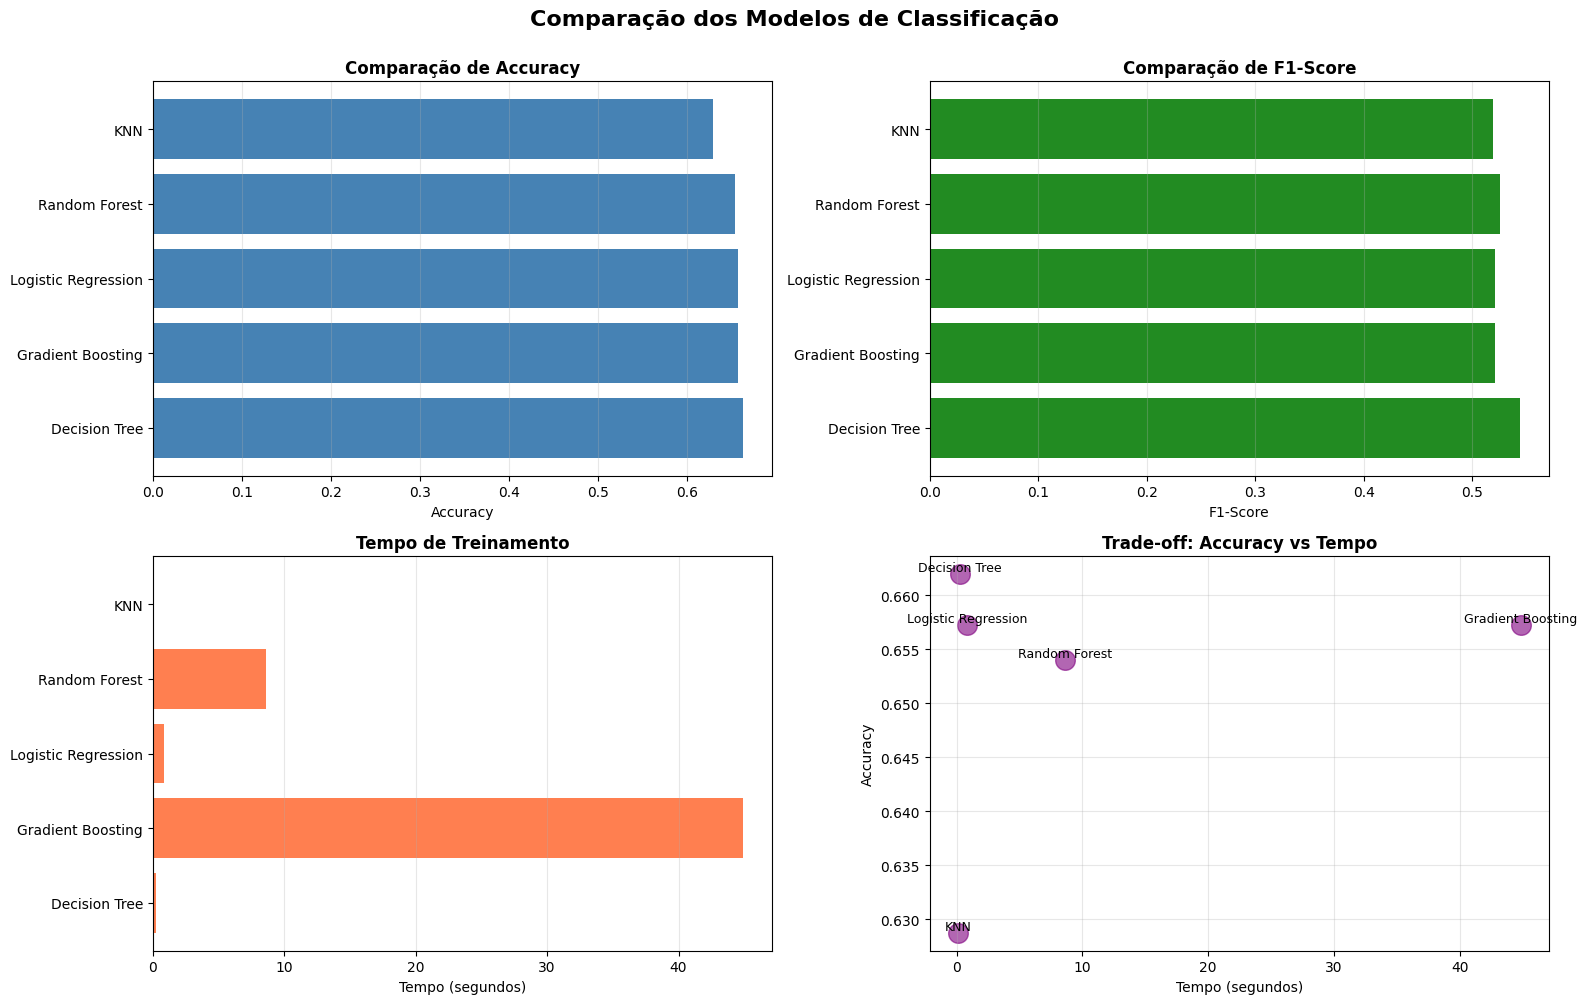

In [ ]:
# Visualizações comparativas
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico 1: Accuracy
axes[0, 0].barh(comparacao['Modelo'], comparacao['Accuracy'], color='steelblue')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Comparação de Accuracy', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 2: F1-Score
axes[0, 1].barh(comparacao['Modelo'], comparacao['F1-Score'], color='forestgreen')
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_title('Comparação de F1-Score', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Gráfico 3: Tempo de execução
axes[1, 0].barh(comparacao['Modelo'], comparacao['Tempo (s)'], color='coral')
axes[1, 0].set_xlabel('Tempo (segundos)')
axes[1, 0].set_title('Tempo de Treinamento', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 4: Accuracy vs Tempo
axes[1, 1].scatter(comparacao['Tempo (s)'], comparacao['Accuracy'], s=200, alpha=0.6, color='purple')
for idx, row in comparacao.iterrows():
    axes[1, 1].annotate(row['Modelo'], (row['Tempo (s)'], row['Accuracy']), 
                        fontsize=9, ha='center', va='bottom')
axes[1, 1].set_xlabel('Tempo (segundos)')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Trade-off: Accuracy vs Tempo', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Comparação dos Modelos de Classificação', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

RELATÓRIO DETALHADO - Decision Tree

Classification Report:
                           precision    recall  f1-score   support

           Ataque a civis       0.00      0.00      0.00        18
                    Briga       0.00      0.00      0.00        43
        Disparo Acidental       0.00      0.00      0.00         3
                  Disputa       0.00      0.00      0.00         6
      Homicidio/Tentativa       0.67      0.99      0.80       416
Sequestro/Cárcere Privado       0.00      0.00      0.00         2
          Tentativa/Roubo       0.50      0.05      0.09       135
             Tiros a esmo       0.00      0.00      0.00        10

                 accuracy                           0.66       633
                macro avg       0.15      0.13      0.11       633
             weighted avg       0.54      0.66      0.54       633

                           precision    recall  f1-score   support

           Ataque a civis       0.00      0.00      0.00        1

/Users/evaldocunhafilho/Documents/Data_Science/Crime-detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/evaldocunhafilho/Documents/Data_Science/Crime-detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/evaldocunhafilho/Documents/Data_Science/Crime-detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



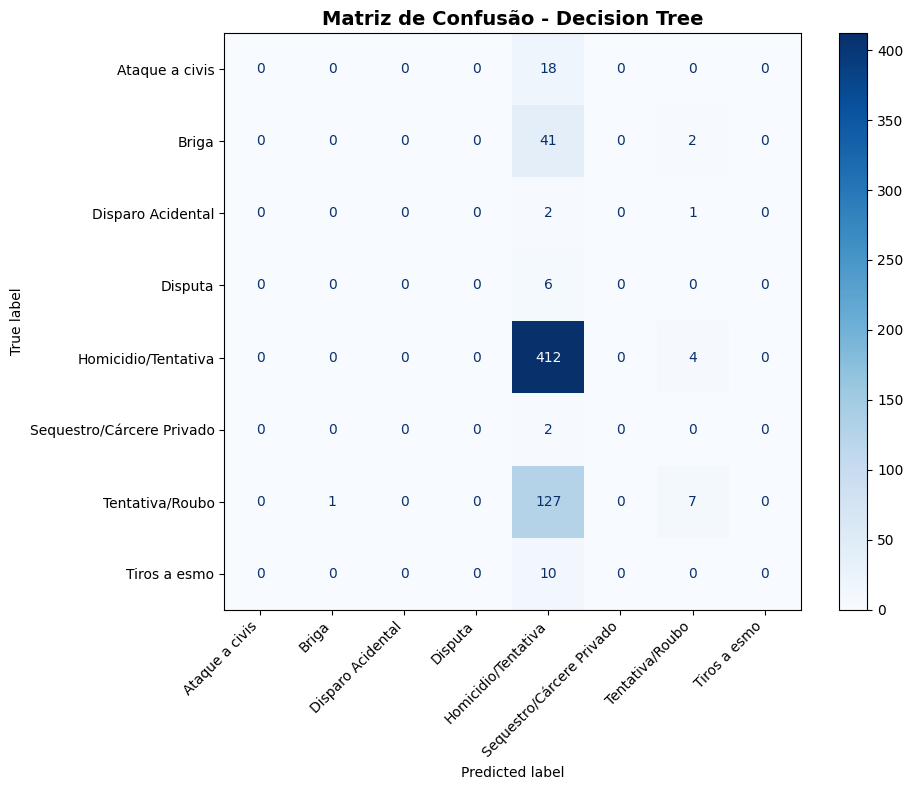


Análise completa!


In [ ]:
# Relatório detalhado do melhor modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

melhor_modelo_nome = comparacao.iloc[0]['Modelo']
melhor_resultado = resultados[melhor_modelo_nome]

print("=" * 70)
print(f"RELATÓRIO DETALHADO - {melhor_modelo_nome}")
print("=" * 70)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, melhor_resultado['y_pred'], 
                          target_names=le_crime.classes_))

# Matriz de Confusão
fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(y_test, melhor_resultado['y_pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_crime.classes_)
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title(f'Matriz de Confusão - {melhor_modelo_nome}', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("Análise completa!")
print("=" * 70)